In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl

In [1]:
# file_path = 'Lie_ResNet_v2_2_epoch_30_results.json'
file_path = 'Lie_ResNet_ssb_v4_epoch_20_results.json'


import json

# Load data from a JSON file
with open(file_path, "r") as f:
    results = json.load(f)

losses = results['losses']
stats = results['stats']


In [3]:

# Scientific plot style
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.2,
    "lines.markersize": 4,
    "figure.dpi": 300,
    "figure.figsize": (6, 4),
    "savefig.bbox": "tight"
})

Saved plot as .svg'


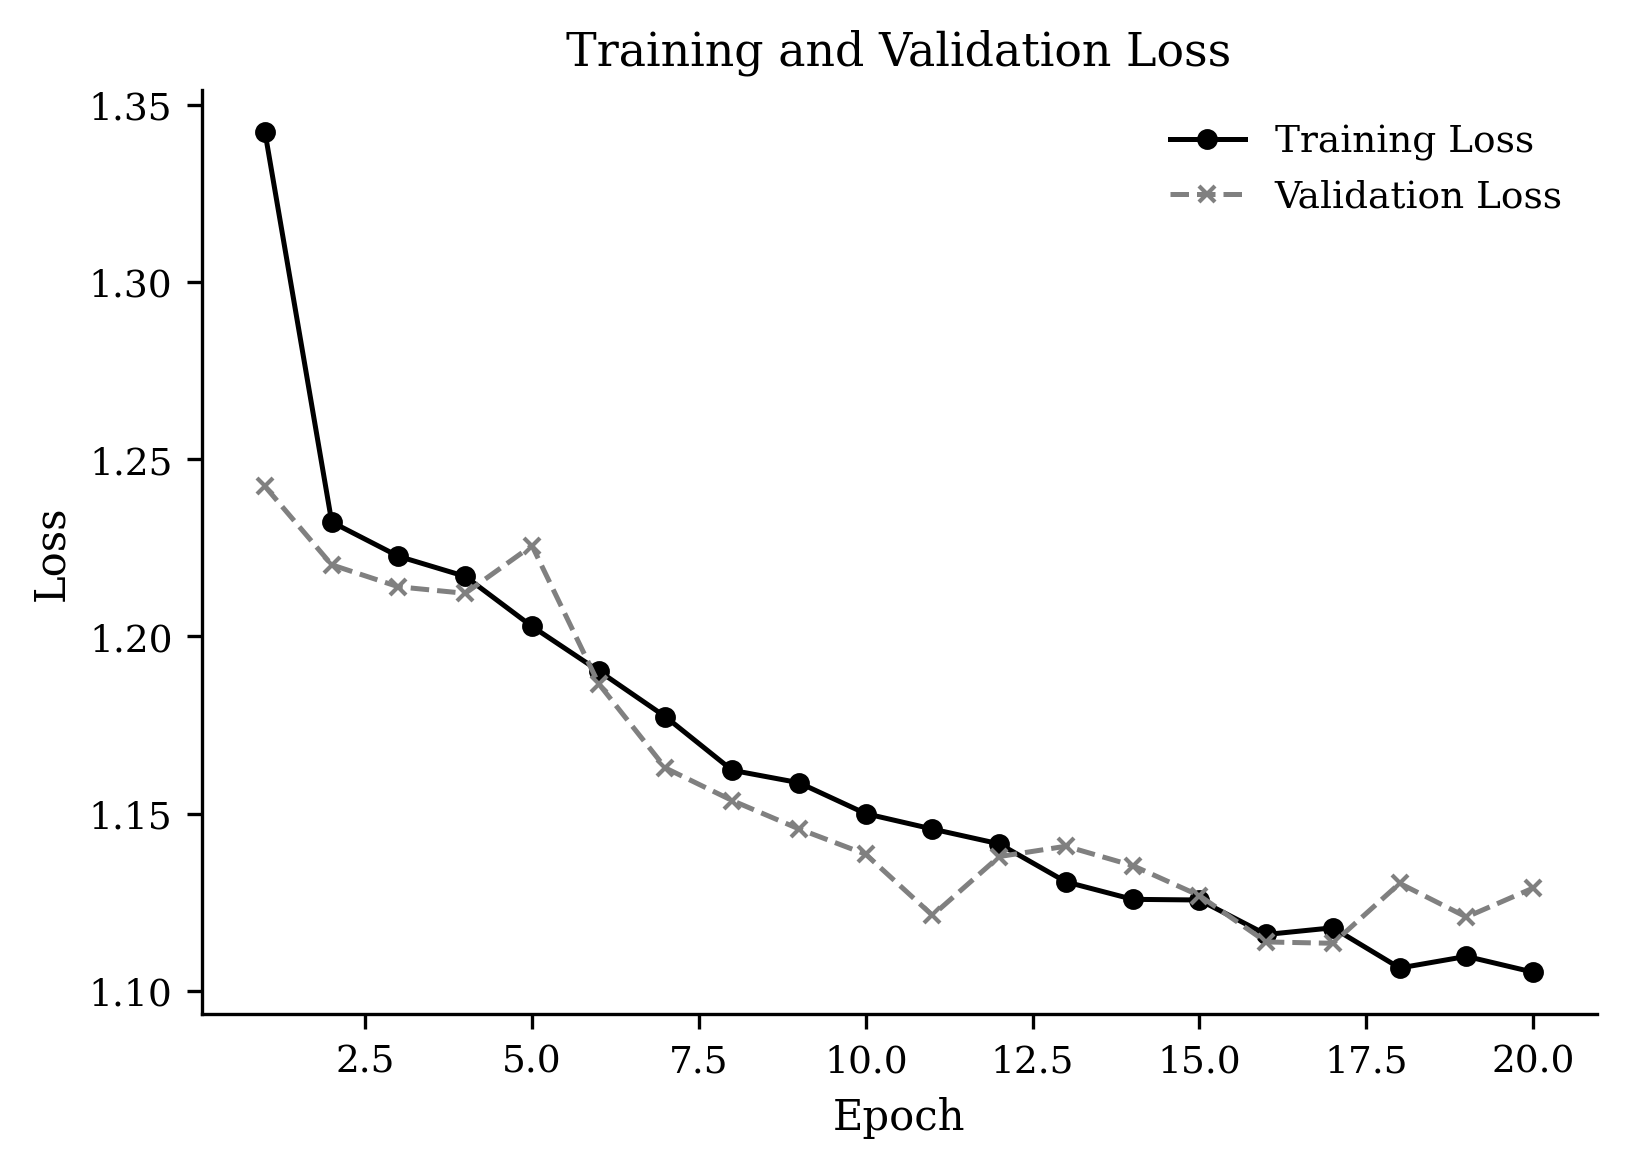

In [37]:


train_loss = losses.get("loss", [])
val_loss = losses.get("val_loss", [])
epochs = list(range(1, len(train_loss) + 1))

fig, ax = plt.subplots()

# Plot the curves
ax.plot(epochs, train_loss, label="Training Loss", marker='o', linestyle='-', color="black")
ax.plot(epochs, val_loss, label="Validation Loss", marker='x', linestyle='--', color="gray")

# # Background shading for phases
# ax.axvspan(0.5, 10.5, color='gray', alpha=0.1)
# ax.axvspan(10.5, 20.5, color='blue', alpha=0.05)
# ax.axvspan(20.5, 30.5, color='green', alpha=0.05)

# # Vertical boundary lines
# ax.axvline(8.0, color='black', linestyle=':', linewidth=0.8)
# ax.axvline(12.0, color='black', linestyle=':', linewidth=0.8)

# # Phase text annotations (bottom of plot)
# y_min, y_max = ax.get_ylim()
# label_y = y_max - 0.1 * (y_max - y_min)
# ax.text(4, label_y, "Warmup", ha='center', va='bottom')
# ax.text(10, label_y, "Plateau", ha='center', va='bottom')
# ax.text(16, label_y, "Tuning", ha='center', va='bottom')

# Labels and legend
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training and Validation Loss")
ax.legend(frameon=False, loc="best")

# Clean up frame
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



# Labels and legend
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training and Validation Loss")
ax.legend(frameon=False, loc="best")

# Clean up frame
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save as SVG
plt.savefig("loss_vs_val_loss_v4.svg", format="svg")
print("Saved plot as .svg'")


In [13]:
stats.keys()

dict_keys(['epoch', 'step', 'epsilon', 'transform', 'mean', 'std', 'std_eps', 'mse', 'spec', 'cos', 'smooth', 'hat', 'lr'])

In [21]:
max(cos)

5.158205687999725

Saved plot as 'metrics_vs_steps_v4.svg'


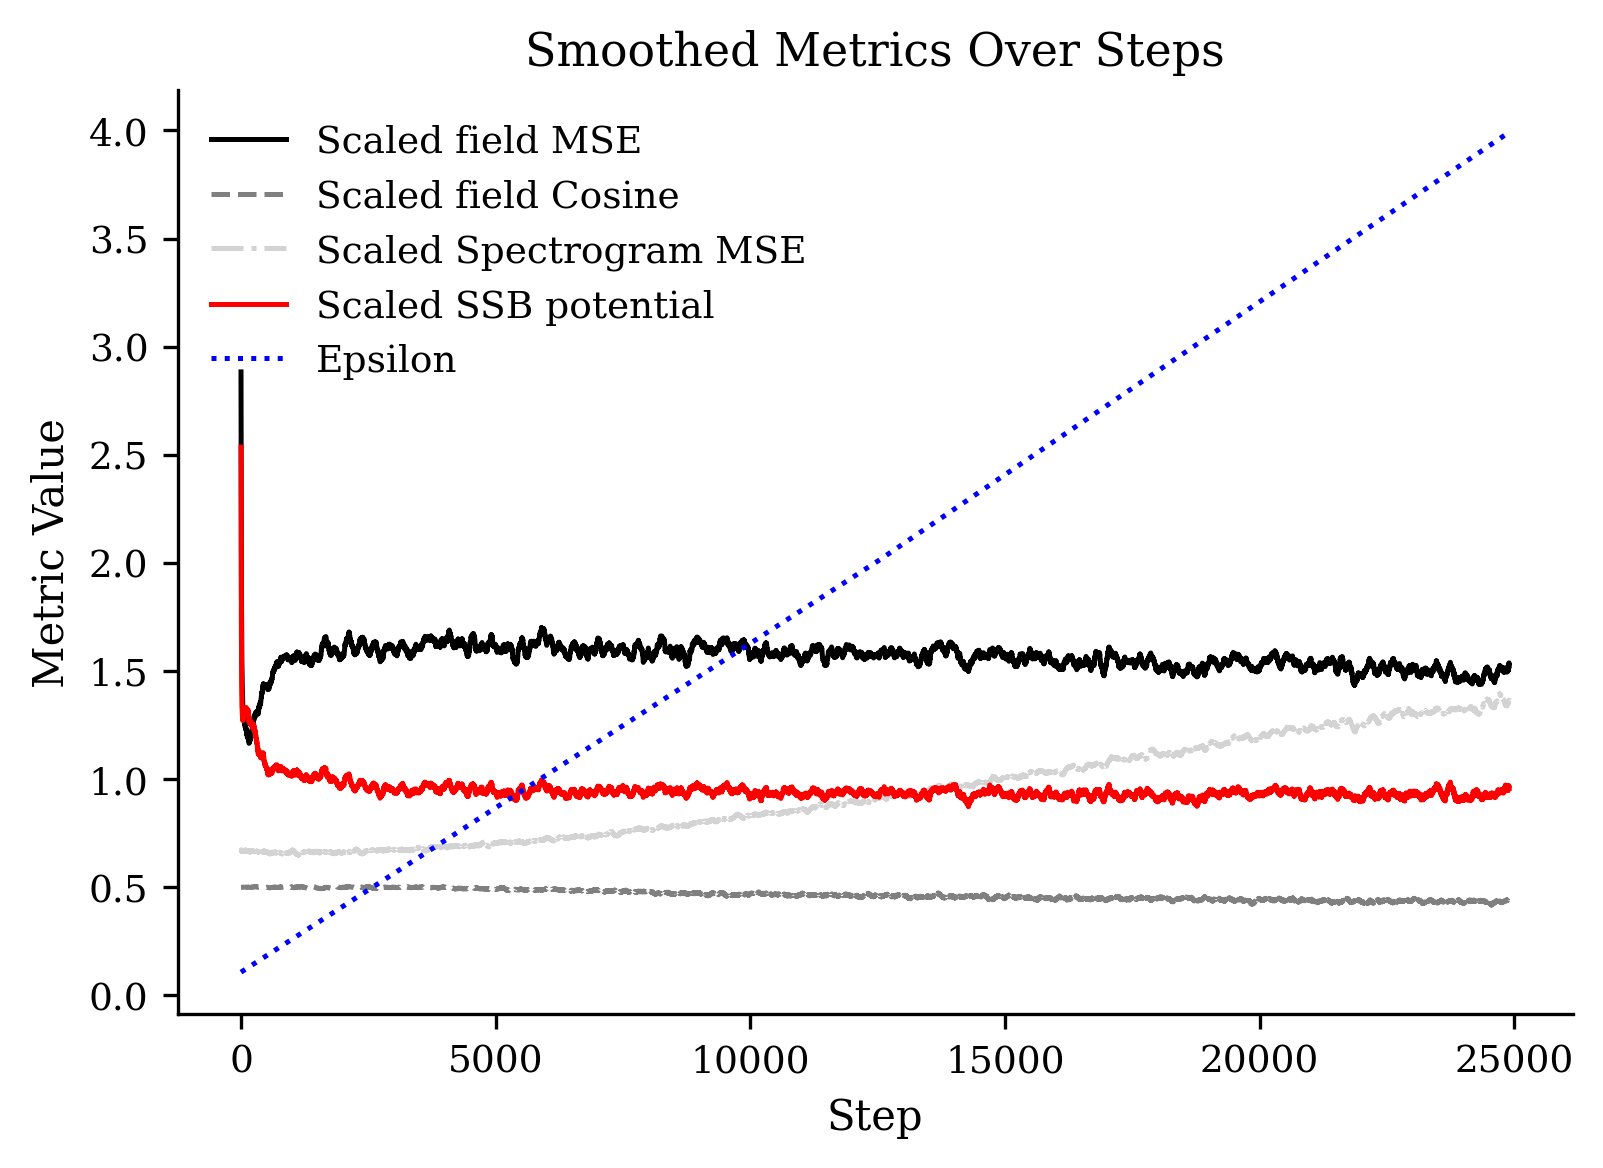

In [36]:
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Scientific plot style
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.2,
    "lines.markersize": 4,
    "figure.dpi": 300,
    "figure.figsize": (6, 4),
    "savefig.bbox": "tight"
})



# --- Helpers ---
def moving_average(arr, window_size=100):
    if len(arr) < window_size:
        return arr
    return np.convolve(arr, np.ones(window_size) / window_size, mode='valid')




steps = np.array(stats.get("step", []))
mse = moving_average(stats.get("mse", []))
cos = moving_average(stats.get("cos", []))
spec = moving_average(stats.get("spec", []))
hat = moving_average(stats.get("hat", []))
epsilon = moving_average(stats.get("epsilon", []))

mse = [20*x for x in mse]
cos = [0.5*x for x in cos]
spec = [30*x for x in spec]
hat = [5*x for x in hat]

# Trim steps to match smoothed curves
smooth_steps = steps[:len(mse)]

# --- Plot ---
fig, ax = plt.subplots()

ax.plot(smooth_steps, mse, label="Scaled field MSE", linestyle='-', color='black')
ax.plot(smooth_steps, cos, label="Scaled field Cosine", linestyle='--', color='gray')
ax.plot(smooth_steps, spec, label="Scaled Spectrogram MSE", linestyle='-.', color='lightgray')
ax.plot(smooth_steps, hat, label="Scaled SSB potential", linestyle='solid', color='red')
ax.plot(smooth_steps, epsilon, label="Epsilon", linestyle=':', color='blue')

# Labels and legend
ax.set_xlabel("Step")
ax.set_ylabel("Metric Value")
ax.set_title("Smoothed Metrics Over Steps")
ax.legend(frameon=False, loc="best")

# Clean frame
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save
plt.savefig("metrics_vs_steps_v4.svg", format="svg")
print("Saved plot as 'metrics_vs_steps_v4.svg'")

